In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-size-2024/Electric_Vehicle_Population_Size_History_By_County_.csv


In [2]:
data = pd.read_csv('/kaggle/input/electric-vehicle-population-size-2024/Electric_Vehicle_Population_Size_History_By_County_.csv')
data.sample(4)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
6854,October 31 2019,Frederick,MD,Passenger,1,1,2,82,84,2.38
19887,February 28 2023,Middlesex,MA,Passenger,2,1,3,74,77,3.90
4849,March 31 2020,Newport,RI,Passenger,0,1,1,82,83,1.20
2126,February 28 2019,Columbia,WA,Passenger,2,2,4,"2,431","2,435",0.16


In [3]:
data.shape

(20819, 10)

In [4]:
print('Information of Data:','\n')
print(data.info(),'\n')

print('Description of Data','\n')
data.describe()

Information of Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(

,Percent Electric Vehicles
count,20819.000000
mean,4.139216
std,11.055350
min,0.000000
25%,0.390000
50%,1.220000
75%,2.995000
max,100.000000


In [5]:
data.sample(4)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
6978,October 31 2021,Powhatan,VA,Passenger,1,0,1,1,2,50.00
17174,February 28 2022,Anne Arundel,MD,Passenger,3,1,4,365,369,1.08
13070,September 30 2020,Island,WA,Passenger,444,281,725,"62,815","63,540",1.14
18885,March 31 2017,Snohomish,WA,Passenger,"1,656",848,"2,504","513,348","515,852",0.49


In [6]:
data['Vehicle Primary Use'] = data['Vehicle Primary Use'].map({'Passenger': 1,'Truck' : 0})

In [7]:
columns_to_convert = ['Electric Vehicle (EV) Total', 'Plug-In Hybrid Electric Vehicles (PHEVs)',
                      'Battery Electric Vehicles (BEVs)', 'Non-Electric Vehicle Total']

# Convert columns to string and then apply transformations
for col in columns_to_convert:
    data[col] = data[col].astype(str).str.replace(',', '').astype(int)

In [8]:
countries_with_EV = data.groupby('County').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Battery Electric Vehicles (BEVs)': 'sum',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Percent Electric Vehicles' : 'mean',
    'Vehicle Primary Use': lambda x: x.mode().iloc[0]
}).reset_index()

In [9]:
countries_with_EV

,County,Electric Vehicle (EV) Total,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Non-Electric Vehicle Total,Percent Electric Vehicles,Vehicle Primary Use
0,Ada,98,40,58,15310,0.808281,1
1,Adams,1758,1074,684,1552459,0.577806,1
2,Alameda,322,247,75,23426,1.596163,1
3,Albemarle,118,107,11,1728,6.967895,1
4,Alexandria,175,163,12,7259,2.597742,1
...,...,...,...,...,...,...,...
306,Yavapai,25,1,24,741,3.676000,1
307,Yellowstone,24,0,24,406,6.325417,1
308,Yolo,12,12,0,240,4.842500,1
309,York,27,27,0,2132,1.276667,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

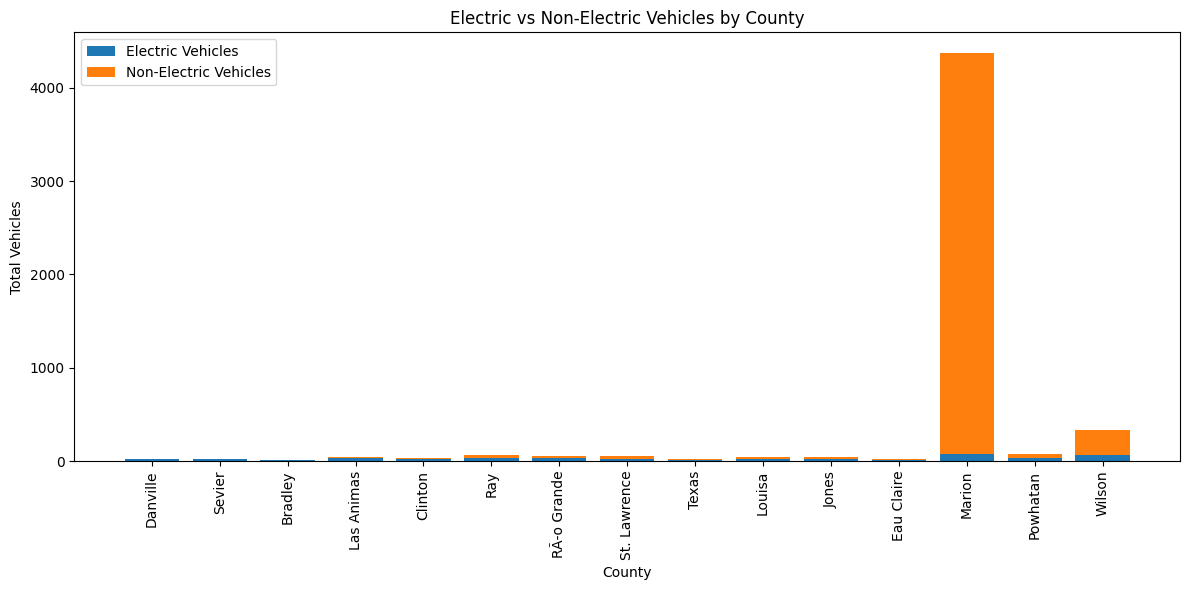

In [11]:
countries_sorted = countries_with_EV.sort_values(by='Percent Electric Vehicles', ascending=False).head(15)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(countries_sorted['County'], countries_sorted['Electric Vehicle (EV) Total'], label='Electric Vehicles')
plt.bar(countries_sorted['County'], countries_sorted['Non-Electric Vehicle Total'], bottom=countries_sorted['Electric Vehicle (EV) Total'], label='Non-Electric Vehicles')
plt.xlabel('County')
plt.ylabel('Total Vehicles')
plt.title('Electric vs Non-Electric Vehicles by County')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

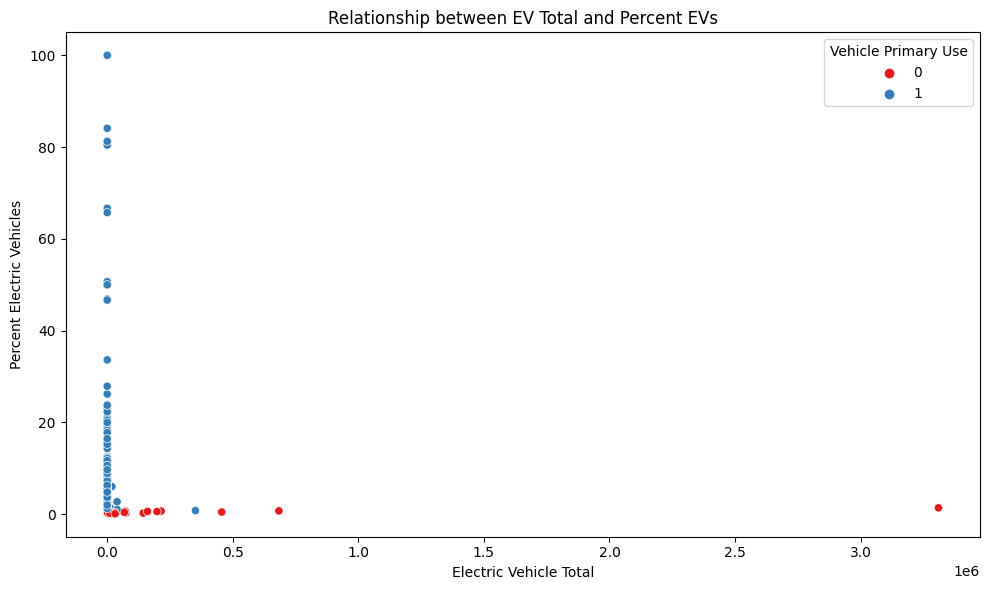

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=countries_with_EV, x='Electric Vehicle (EV) Total', y='Percent Electric Vehicles', hue='Vehicle Primary Use', palette='Set1')
plt.xlabel('Electric Vehicle Total')
plt.ylabel('Percent Electric Vehicles')
plt.title('Relationship between EV Total and Percent EVs')
plt.legend(title='Vehicle Primary Use', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

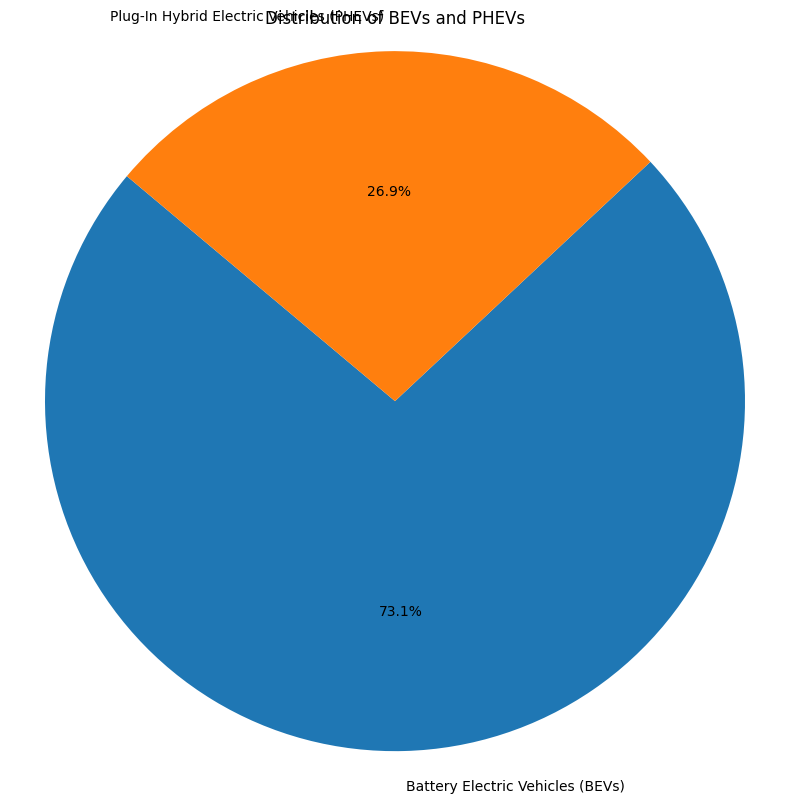

In [13]:
plt.figure(figsize=(8, 8))
labels = ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']
sizes = [countries_with_EV['Battery Electric Vehicles (BEVs)'].sum(), countries_with_EV['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BEVs and PHEVs')
plt.axis('equal')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


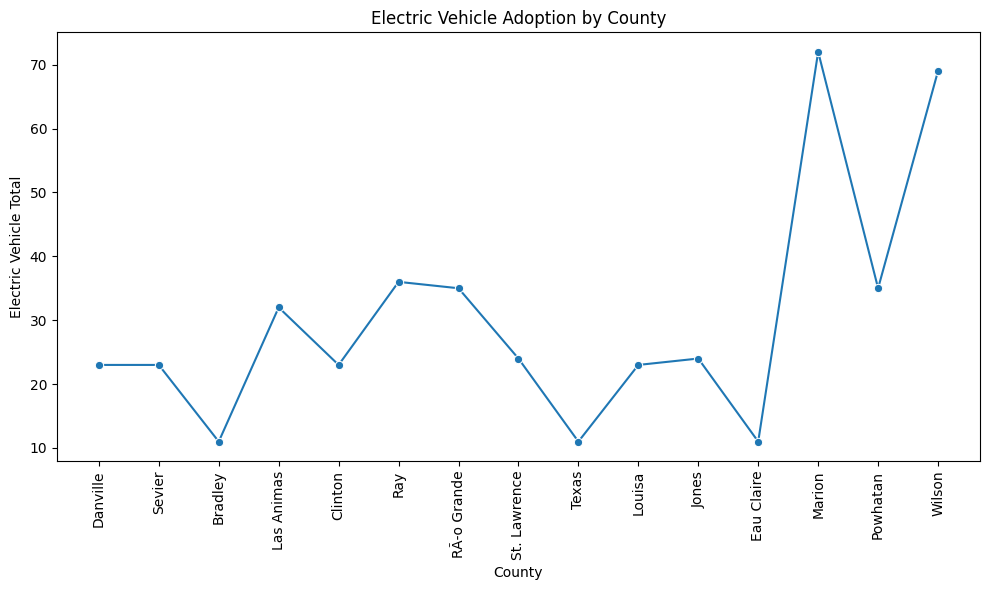

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=countries_sorted, x='County', y='Electric Vehicle (EV) Total', marker='o')
plt.xlabel('County')
plt.ylabel('Electric Vehicle Total')
plt.title('Electric Vehicle Adoption by County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
countries_with_EV.drop(columns=['County'],axis=1,inplace=True)

In [16]:
from sklearn.cluster import KMeans

In [17]:
expected_clustors = range(1,5)
wcss = []
for i in expected_clustors:
    kmeans = KMeans(i)
    kmeans.fit(countries_with_EV)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


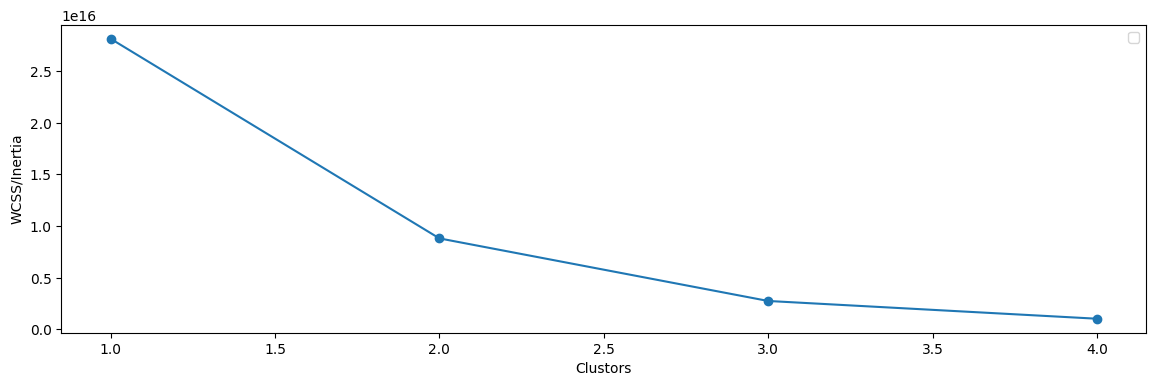

In [18]:
plt.figure(figsize=(14,4))
plt.plot(expected_clustors,wcss,marker='o')
plt.xlabel('Clustors')
plt.ylabel('WCSS/Inertia')
plt.legend()
plt.show()

In [19]:
kmeans2 = KMeans(n_clusters=3)

In [20]:
kmeans2.fit(countries_with_EV)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
avg_silhouette_score = silhouette_score(countries_with_EV,kmeans2.labels_)
print('The avg_silhouette_score is ',avg_silhouette_score)

The avg_silhouette_score is  0.9526594267887935
